<a href="https://colab.research.google.com/github/KunalDorik/Tamizan-Skills-Internship-ML-AI-PROJECT-7/blob/main/Project_7_Emotion_Detection_from_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Sample: Load dataset (replace with your file path)
df = pd.read_csv('emotion_dataset.csv')  # columns: 'text', 'emotion'
print(df.head())


     tweet_id   sentiment                                            content
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696     sadness                Funeral ceremony...gloomy friday...
3  1956967789  enthusiasm               wants to hang out with friends SOON!
4  1956968416     neutral  @dannycastillo We want to trade with someone w...


In [ ]:
# Check class distribution
print(df['sentiment'].value_counts())

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['content'], df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment'])

sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64


In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        22
     boredom       0.50      0.03      0.05        36
       empty       0.00      0.00      0.00       165
  enthusiasm       0.00      0.00      0.00       152
         fun       0.21      0.02      0.04       355
   happiness       0.35      0.37      0.36      1042
        hate       0.43      0.11      0.17       265
        love       0.53      0.39      0.45       768
     neutral       0.34      0.56      0.42      1728
      relief       0.23      0.03      0.05       305
     sadness       0.36      0.25      0.30      1033
    surprise       0.26      0.04      0.07       437
       worry       0.35      0.52      0.42      1692

    accuracy                           0.36      8000
   macro avg       0.27      0.18      0.18      8000
weighted avg       0.34      0.36      0.32      8000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


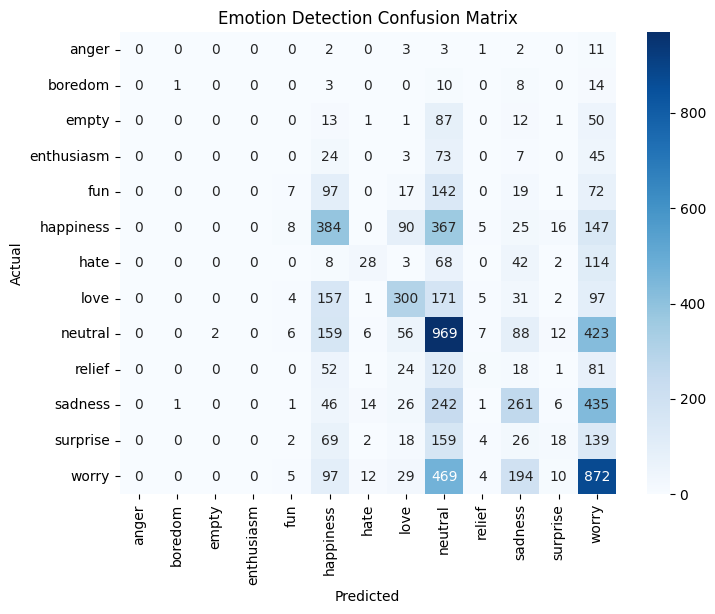

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Emotion Detection Confusion Matrix')
plt.show()


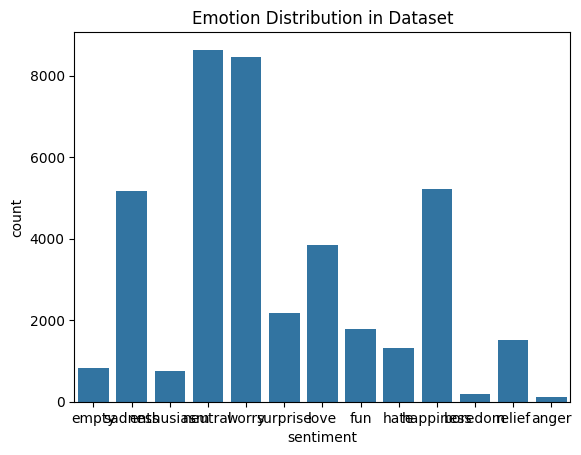

In [ ]:
sns.countplot(x='sentiment', data=df)
plt.title('Emotion Distribution in Dataset')
plt.show()

In [ ]:
def predict_emotion(text):
    vec = vectorizer.transform([text])
    pred = model.predict(vec)[0]
    return pred

sample_text = "I am so happy to see you!"
print("Predicted emotion:", predict_emotion(sample_text))


Predicted emotion: happiness
